In [1]:
%%time
import malaya

CPU times: user 6.31 s, sys: 1.45 s, total: 7.76 s
Wall time: 11.8 s


In [2]:
anger_text = 'babi la company ni, aku dah la penat datang dari jauh'
fear_text = 'takut doh tengok cerita hantu tadi'
joy_text = 'bestnya dapat tidur harini, tak payah pergi kerja'
love_text = 'aku sayang sgt dia dah doh'
sadness_text = 'kecewa tengok kerajaan baru ni, janji ape pun tak dapat'
surprise_text = 'sakit jantung aku, terkejut dengan cerita hantu tadi'

All models got `get_proba` parameters.
If True, it will returned probability every classes. Else, it will return highest probability class. **Default is True.**

## Load multinomial model

In [3]:
model = malaya.emotion.multinomial()
print(model.predict(anger_text))
print(model.predict(anger_text,get_proba=True))
model.predict_batch([anger_text,
                    fear_text,
                    joy_text,
                    love_text,
                    sadness_text,
                    surprise_text])

anger
{'anger': 0.2611975058422004, 'fear': 0.126458937751778, 'joy': 0.14950927633075184, 'love': 0.15828870784341198, 'sadness': 0.17548854227622668, 'surprise': 0.12905702995563215}


['anger', 'fear', 'surprise', 'love', 'sadness', 'surprise']

## List available Transformer models

In [4]:
malaya.emotion.available_transformer_model()

{'bert': ['base', 'small'], 'xlnet': ['base'], 'albert': ['base']}

Make sure you can check accuracy chart from here first before select a model, https://malaya.readthedocs.io/en/latest/Accuracy.html#emotion-analysis

**You might want to use ALBERT, a very small size, 43MB, but the accuracy is still on the top notch.**

## Load BERT model

In [6]:
model = malaya.emotion.transformer(model = 'bert', size = 'small')

W1017 22:10:55.813647 4669789632 deprecation_wrapper.py:119] From /Users/huseinzol/Documents/Malaya/malaya/_utils/_utils.py:68: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

W1017 22:10:55.817269 4669789632 deprecation_wrapper.py:119] From /Users/huseinzol/Documents/Malaya/malaya/_utils/_utils.py:69: The name tf.GraphDef is deprecated. Please use tf.compat.v1.GraphDef instead.

W1017 22:10:58.647607 4669789632 deprecation_wrapper.py:119] From /Users/huseinzol/Documents/Malaya/malaya/_utils/_utils.py:64: The name tf.InteractiveSession is deprecated. Please use tf.compat.v1.InteractiveSession instead.



#### Predict single string

In [7]:
model.predict(anger_text,get_proba=True)

{'anger': 0.9998387,
 'fear': 0.00015925607,
 'joy': 1.4158436e-06,
 'love': 2.2607807e-07,
 'sadness': 3.5324396e-07,
 'surprise': 1.493917e-09}

#### Predict batch of strings

In [8]:
model.predict_batch([anger_text, fear_text, joy_text,
                    love_text, sadness_text, surprise_text],get_proba=True)

[{'anger': 0.999967,
  'fear': 3.1019e-05,
  'joy': 9.3578916e-07,
  'love': 8.069192e-07,
  'sadness': 1.9151632e-07,
  'surprise': 5.3283973e-09},
 {'anger': 2.7872588e-08,
  'fear': 0.9999925,
  'joy': 6.6718403e-06,
  'love': 8.4267407e-07,
  'sadness': 2.088349e-08,
  'surprise': 4.9783313e-08},
 {'anger': 0.11070438,
  'fear': 0.84919304,
  'joy': 5.272726e-06,
  'love': 0.0399928,
  'sadness': 0.000100712394,
  'surprise': 3.8468006e-06},
 {'anger': 4.374225e-06,
  'fear': 5.6794994e-07,
  'joy': 2.0245703e-07,
  'love': 0.9999949,
  'sadness': 3.886778e-08,
  'surprise': 1.59989e-08},
 {'anger': 4.429462e-05,
  'fear': 1.1004681e-06,
  'joy': 3.3026482e-09,
  'love': 3.1222495e-08,
  'sadness': 0.9999546,
  'surprise': 5.33118e-08},
 {'anger': 0.0004420832,
  'fear': 0.00097265776,
  'joy': 0.0002473691,
  'love': 0.0009974391,
  'sadness': 0.56158155,
  'surprise': 0.43575892}]

#### Open emotion visualization dashboard

Default when you call `predict_words` it will open a browser with visualization dashboard, you can disable by `visualization=False`.

In [10]:
model.predict_words(sadness_text)

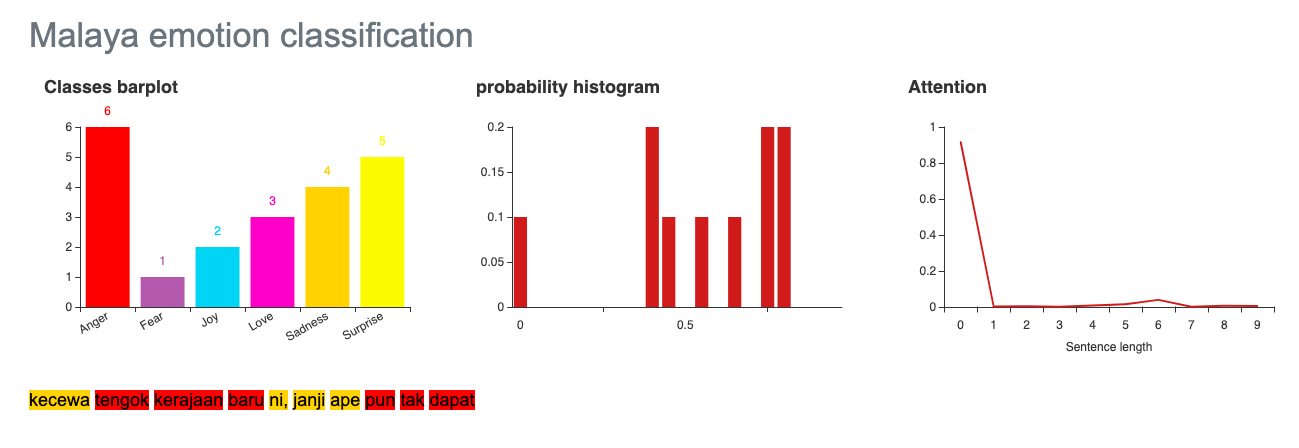

In [11]:
from IPython.core.display import Image, display

display(Image('emotion-bert.png', width=800))

## Stacking models

More information, you can read at [https://malaya.readthedocs.io/en/latest/Stack.html](https://malaya.readthedocs.io/en/latest/Stack.html)

In [12]:
multinomial = malaya.emotion.multinomial()

In [13]:
malaya.stack.predict_stack([multinomial, model], anger_text)

[{'anger': 0.5110701622264388,
  'fear': 0.0015030670756998694,
  'joy': 0.00010128863548173158,
  'love': 0.0002393405793062825,
  'sadness': 4.8518840782529094e-05,
  'surprise': 3.446262938211491e-06}]

In [14]:
malaya.stack.predict_stack([multinomial, model], [anger_text, sadness_text])

[{'anger': 0.5108635985076825,
  'fear': 0.010215957164991074,
  'joy': 0.0002369261921911302,
  'love': 0.00035127684686427296,
  'sadness': 0.00010086046614711628,
  'surprise': 4.586600608224377e-06},
 {'anger': 0.0001340990772442865,
  'fear': 6.673330937532275e-05,
  'joy': 7.930393733677666e-06,
  'love': 4.6907952784882726e-05,
  'sadness': 0.5392643694134984,
  'surprise': 0.0005584244071919486}]